<a href="https://colab.research.google.com/github/suraj-chauhan-21/-Single_RNA_seq-Scanpy-/blob/main/Single_RNA_Seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scanpy


In [ ]:
import scanpy as sc


In [ ]:
import pandas as pd
import scanpy as sc

# Try loading the CSV with pandas, which is often more forgiving with malformed files.
# We'll use the original filename from the error message.
csv_file_path = '/GSM5226574_C51ctr_raw_counts.csv'

try:
    df = pd.read_csv(csv_file_path, index_col=0) # Assuming the first column might be row names
    print("Successfully loaded CSV into a pandas DataFrame.")
    print(f"DataFrame shape: {df.shape}")
    display(df.head())

    # If the user intends to use scanpy, convert the DataFrame to an AnnData object.
    # The .T is applied here as it was in the original code, implying genes as columns and cells as rows.
    adata = sc.AnnData(df.T)
    print("\nSuccessfully converted DataFrame to AnnData object.")
    print(f"AnnData object shape: {adata.shape}")
    display(adata.obs.head())
    display(adata.var.head())


except Exception as e:
    print(f"An error occurred while loading or converting the file: {e}")
    print("Please ensure the file exists at the specified path and is not corrupted.")
    adata.obs = pd.DataFrame(index=df.index)
    adata.var = pd.DataFrame(index=df.columns)
    adata.X.shape




Successfully loaded CSV into a pandas DataFrame.
DataFrame shape: (2909, 6099)


,TAGGTACCATGGCCAC-1_1,ATTCACTGTAACAGGC-1_1,TAACTTCCAACCACGC-1_1,TTGGGTACACGACAAG-1_1,AGGCCACAGAGTCACG-1_1,CACTGAAGTCGAAGCA-1_1,ACTGATGTCTGCACCT-1_1,TTACCGCCACTCAGAT-1_1,TTGGTTTTCCTAGCTC-1_1,TGGGAAGTCAGTGATC-1_1,...,AAGTCGTGTGTGAATA-1_1,GTCGTTCTCCAAGGGA-1_1,GTTTGGATCGGCCTTT-1_1,GTACAGTCACGTATAC-1_1,TCATGCCCAAGAGGTC-1_1,CGCCATTGTTTGCCGG-1_1,CACTGGGGTCTACGTA-1_1,CATACTTGTAGAGGAA-1_1,TTTGGTTTCCACGGAC-1_1,ATGCATGAGTCATGAA-1_1
AL627309.1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.5,0,0,0,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL669831.2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINC01409,1,0,2,0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Successfully converted DataFrame to AnnData object.
AnnData object shape: (6099, 2909)


""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1


""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409


If the pandas loading also fails or results in a DataFrame with unexpected dimensions, you might need to manually inspect the CSV file to understand its structure and fix any inconsistencies. Tools like a text editor or spreadsheet software can help you identify malformed rows.

In [ ]:
pip install scvi-tools

In [ ]:
import scvi
sc.pp.filter_genes(adata, min_cells=10)
adata

AnnData object with n_obs × n_vars = 6099 × 2000
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [ ]:
 sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset = True, flavor = 'seurat_v3')
 adata

AnnData object with n_obs × n_vars = 6099 × 2000
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [ ]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Training:   0%|          | 0/400 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


In [ ]:
 solo = scvi.external.SOLO.from_scvi_model(vae)
 solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.302. Signaling Trainer to stop.


In [ ]:
solo.predict()

/usr/local/lib/python3.12/dist-packages/torch/utils/_contextlib.py:120: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


,doublet,singlet
TAGGTACCATGGCCAC-1_1,0.920285,0.079715
ATTCACTGTAACAGGC-1_1,0.935335,0.064665
TAACTTCCAACCACGC-1_1,0.760538,0.239462
TTGGGTACACGACAAG-1_1,0.889788,0.110212
AGGCCACAGAGTCACG-1_1,0.640489,0.359511
...,...,...
CGCCATTGTTTGCCGG-1_1,0.016129,0.983871
CACTGGGGTCTACGTA-1_1,0.007405,0.992595
CATACTTGTAGAGGAA-1_1,0.004556,0.995444
TTTGGTTTCCACGGAC-1_1,0.010218,0.989782


from matplotlib import pyplot as plt
_df_0['doublet'].plot(kind='hist', bins=20, title='doublet')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['singlet'].plot(kind='hist', bins=20, title='singlet')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='doublet', y='singlet', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['doublet'].plot(kind='line', figsize=(8, 4), title='doublet')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['singlet'].plot(kind='line', figsize=(8, 4), title='singlet')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['doublet'].plot(kind='hist', bins=20, title='doublet')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['singlet'].plot(kind='hist', bins=20, title='singlet')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='doublet', y='singlet', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['doublet'].plot(kind='line', figsize=(8, 4), title='doublet')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['singlet'].plot(kind='line', figsize=(8, 4), title='singlet')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df

/usr/local/lib/python3.12/dist-packages/torch/utils/_contextlib.py:120: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/torch/utils/_contextlib.py:120: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


,doublet,singlet,prediction
TAGGTACCATGGCCAC-1_1,0.930053,0.069947,doublet
ATTCACTGTAACAGGC-1_1,0.981916,0.018084,doublet
TAACTTCCAACCACGC-1_1,0.861940,0.138060,doublet
TTGGGTACACGACAAG-1_1,0.869808,0.130192,doublet
AGGCCACAGAGTCACG-1_1,0.938020,0.061980,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1_1,0.039710,0.960290,singlet
CACTGGGGTCTACGTA-1_1,0.004741,0.995259,singlet
CATACTTGTAGAGGAA-1_1,0.043099,0.956901,singlet
TTTGGTTTCCACGGAC-1_1,0.092989,0.907011,singlet


In [ ]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1375,1375
singlet,4724,4724


In [ ]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1_1,0.930053,0.069947,doublet,0.860106
ATTCACTGTAACAGGC-1_1,0.981916,0.018084,doublet,0.963832
TAACTTCCAACCACGC-1_1,0.861940,0.138060,doublet,0.723880
TTGGGTACACGACAAG-1_1,0.869808,0.130192,doublet,0.739616
AGGCCACAGAGTCACG-1_1,0.938020,0.061980,doublet,0.876040
...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,0.039710,0.960290,singlet,-0.920580
CACTGGGGTCTACGTA-1_1,0.004741,0.995259,singlet,-0.990517
CATACTTGTAGAGGAA-1_1,0.043099,0.956901,singlet,-0.913803
TTTGGTTTCCACGGAC-1_1,0.092989,0.907011,singlet,-0.814022


In [ ]:
import seaborn as sns


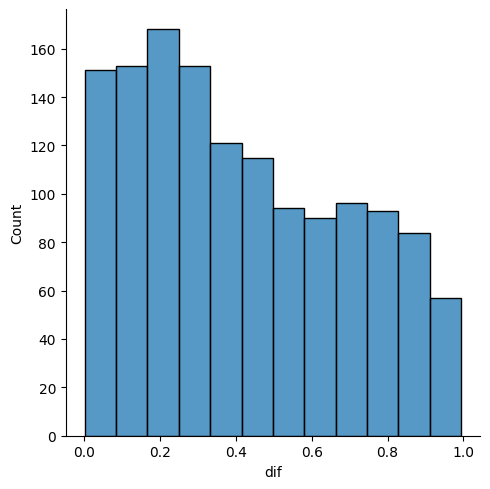

In [ ]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [ ]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.5)]
doublets

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1_1,0.930053,0.069947,doublet,0.860106
ATTCACTGTAACAGGC-1_1,0.981916,0.018084,doublet,0.963832
TAACTTCCAACCACGC-1_1,0.861940,0.138060,doublet,0.723880
TTGGGTACACGACAAG-1_1,0.869808,0.130192,doublet,0.739616
AGGCCACAGAGTCACG-1_1,0.938020,0.061980,doublet,0.876040
...,...,...,...,...
CTATAGGTCACTGGGC-1_1,0.783079,0.216921,doublet,0.566157
AGGCTGCGTTCTTAGG-1_1,0.867425,0.132575,doublet,0.734850
CGGGTCACAGACCAAG-1_1,0.898786,0.101214,doublet,0.797572
GCGAGAAAGCATTTCG-1_1,0.800654,0.199346,doublet,0.601308


In [ ]:
adata

AnnData object with n_obs × n_vars = 6099 × 2000
    obs: '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [ ]:
adata = sc.read_csv('/GSM5226574_C51ctr_raw_counts.csv').T
adata.obs

""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1
...
CGCCATTGTTTGCCGG-1_1
CACTGGGGTCTACGTA-1_1
CATACTTGTAGAGGAA-1_1
TTTGGTTTCCACGGAC-1_1


In [ ]:
adata.obs['doublet']= adata.obs.index.isin(doublets.index)
adata.obs

,doublet
TAGGTACCATGGCCAC-1_1,True
ATTCACTGTAACAGGC-1_1,True
TAACTTCCAACCACGC-1_1,True
TTGGGTACACGACAAG-1_1,True
AGGCCACAGAGTCACG-1_1,True
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [ ]:
df.groupby('prediction').count()

,doublet,singlet,dif
prediction,,,
doublet,1375,1375,1375
singlet,4724,4724,4724


In [ ]:
adata =adata[~adata.obs.doublet]
adata

View of AnnData object with n_obs × n_vars = 5589 × 34546
    obs: 'doublet'

Preprocessing
  

In [ ]:
adata.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


In [ ]:
adata.var[adata.var.index.str.startswith('MT-')]

""
MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4


In [ ]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')

/tmp/ipython-input-310233584.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var.index.str.startswith('MT-')


In [ ]:
adata.var


,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [ ]:
 ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [ ]:

ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [ ]:

adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [ ]:
ribo_genes[0].values

array(['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12',
       'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A',
       'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24',
       'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3',
       'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36',
       'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L',
       'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9',
       'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13',
       'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2',
       'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27',
       'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X',
       'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA',
       'RSL24D1', 'RSL24D1P11', 'UBA52'], dtype=object)

In [ ]:
adata.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


In [ ]:
adata.obs

,doublet
TTACCGCCACTCAGAT-1_1,False
CGCATAACATGCCGGT-1_1,False
CACTTCGCAGTACTAC-1_1,False
CTGTAGATCAACGTGT-1_1,False
CCTTGTGCAGAGGGTT-1_1,False
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [ ]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)


In [ ]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,False,False,7,0.001252,99.874754,7.0
AL627309.5,False,False,27,0.004831,99.516908,27.0
AL627309.4,False,False,3,0.000537,99.946323,3.0
AL669831.2,False,False,1,0.000179,99.982108,1.0
LINC01409,False,False,227,0.043836,95.938451,245.0
...,...,...,...,...,...,...
VN1R2,False,False,0,0.000000,100.000000,0.0
AL031676.1,False,False,0,0.000000,100.000000,0.0
SMIM34A,False,False,0,0.000000,100.000000,0.0
AL050402.1,False,False,0,0.000000,100.000000,0.0


In [ ]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TTACCGCCACTCAGAT-1_1,False,4144,11369.0,39.0,0.343038,5.0,0.043979
CGCATAACATGCCGGT-1_1,False,3745,8617.0,119.0,1.380991,25.0,0.290124
CACTTCGCAGTACTAC-1_1,False,3244,8059.0,253.0,3.139347,14.0,0.173719
CTGTAGATCAACGTGT-1_1,False,3108,7602.0,1.0,0.013154,1.0,0.013154
CCTTGTGCAGAGGGTT-1_1,False,3101,7654.0,575.0,7.512412,9.0,0.117586
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [ ]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
LINC00319,False,False,0,0.000000,100.000000,0.0
AL928921.1,False,False,0,0.000000,100.000000,0.0
LINC02522,False,False,0,0.000000,100.000000,0.0
AL139275.2,False,False,0,0.000000,100.000000,0.0
AL356277.2,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,3996,2.775094,28.502415,15510.0
MBNL1,False,False,4080,2.578816,26.999463,14413.0
NEAT1,False,False,4095,4.643228,26.731079,25951.0
ZBTB20,False,False,4229,2.375201,24.333512,13275.0


In [ ]:

adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
LINC00319,False,False,0,0.000000,100.000000,0.0
AL928921.1,False,False,0,0.000000,100.000000,0.0
LINC02522,False,False,0,0.000000,100.000000,0.0
AL139275.2,False,False,0,0.000000,100.000000,0.0
AL356277.2,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,3996,2.775094,28.502415,15510.0
MBNL1,False,False,4080,2.578816,26.999463,14413.0
NEAT1,False,False,4095,4.643228,26.731079,25951.0
ZBTB20,False,False,4229,2.375201,24.333512,13275.0


In [ ]:

sc.pp.filter_genes(adata, min_cells=3)

In [ ]:

adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AC022296.4,False,False,3,0.000537,99.946323,3.0,3
ZIC1,False,False,3,0.000537,99.946323,3.0,3
AC236972.3,False,False,3,0.000537,99.946323,3.0,3
PNMA6A,False,False,3,0.000537,99.946323,3.0,3
VWA1,False,False,3,0.000537,99.946323,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,3996,2.775094,28.502415,15510.0,3996
MBNL1,False,False,4080,2.578816,26.999463,14413.0,4080
NEAT1,False,False,4095,4.643228,26.731079,25951.0,4095
ZBTB20,False,False,4229,2.375201,24.333512,13275.0,4229


In [ ]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AC022296.4,False,False,3,0.000537,99.946323,3.0,3
ZIC1,False,False,3,0.000537,99.946323,3.0,3
AC236972.3,False,False,3,0.000537,99.946323,3.0,3
PNMA6A,False,False,3,0.000537,99.946323,3.0,3
VWA1,False,False,3,0.000537,99.946323,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,3996,2.775094,28.502415,15510.0,3996
MBNL1,False,False,4080,2.578816,26.999463,14413.0,4080
NEAT1,False,False,4095,4.643228,26.731079,25951.0,4095
ZBTB20,False,False,4229,2.375201,24.333512,13275.0,4229


In [ ]:

#sc.pp.filter_cells(adata, min_genes=200)

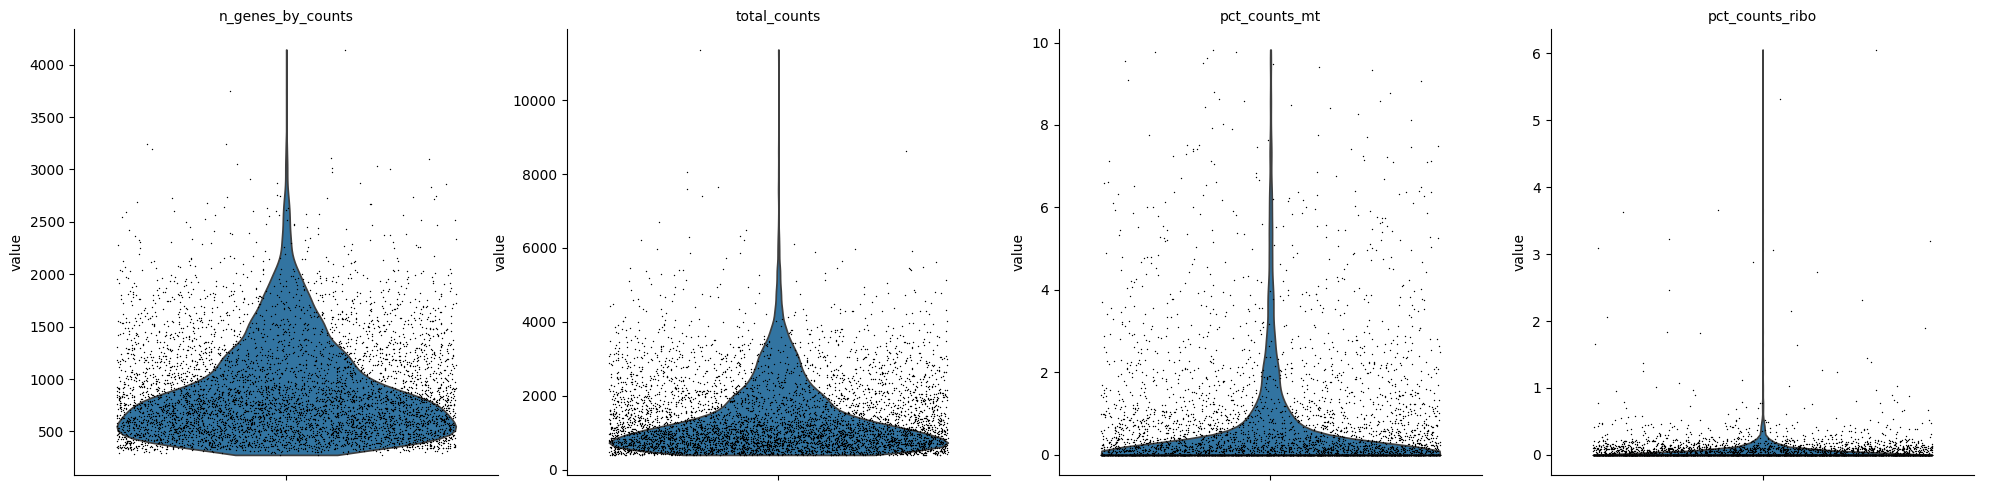

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

In [ ]:
import numpy as np


In [ ]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
#upper_lim = 3000

In [ ]:

upper_lim

In [ ]:

adata = adata[adata.obs.n_genes_by_counts < upper_lim]

In [ ]:
adata.obs